# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Model selection

### Setup and reading the data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from src.dataset import load_processed_data
from src.evaluation import custom_classification_report

In [3]:
x_train, y_train, x_test, y_test = load_processed_data(frac=0.1)

Number of records:
  x_train - 47243
  y_train - 47243
  x_test - 11810
  y_test - 11810


### Train DecisionTreeClassifier

In [4]:
%%time

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

CPU times: user 9.87 s, sys: 224 ms, total: 10.1 s
Wall time: 12.6 s


not fraud
precision: 0.9769690576652602
recall: 0.9783450704225352
f1-score: 0.9776565798733285
support: 11360


is fraud
precision: 0.43317972350230416
recall: 0.4177777777777778
f1-score: 0.4253393665158371
support: 450


accuracy: 0.9569856054191364


macro avg
precision: 0.7050743905837822
recall: 0.6980614241001565
f1-score: 0.7014979731945828
support: 11810


weighted avg
precision: 0.9562488882856388
recall: 0.9569856054191364
f1-score: 0.9566114701348974
support: 11810


CPU times: user 746 ms, sys: 647 ms, total: 1.39 s
Wall time: 4.67 s


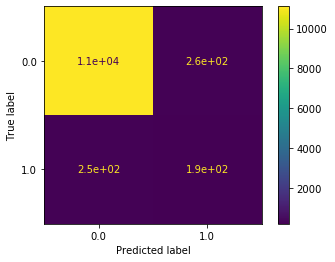

In [5]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train LogisticRegressionCV

In [6]:
%%time

clf = LogisticRegressionCV()
clf = clf.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CPU times: user 2min 30s, sys: 1min 20s, total: 3min 50s
Wall time: 1min


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


not fraud
precision: 1.0
recall: 0.9632514817950889
f1-score: 0.9812818079875788
support: 11810


is fraud
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 0


accuracy: 0.9632514817950889


macro avg
precision: 0.5
recall: 0.48162574089754445
f1-score: 0.4906409039937894
support: 11810


weighted avg
precision: 1.0
recall: 0.9632514817950889
f1-score: 0.9812818079875787
support: 11810


CPU times: user 490 ms, sys: 321 ms, total: 811 ms
Wall time: 303 ms


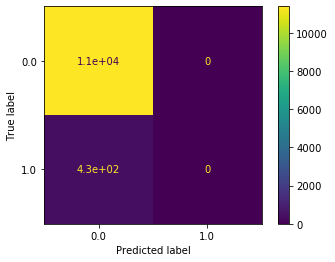

In [7]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train LinearSVC

In [8]:
%%time

clf = LinearSVC()
clf = clf.fit(x_train, y_train)

CPU times: user 1min, sys: 0 ns, total: 1min
Wall time: 1min


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


not fraud
precision: 0.9999120956399438
recall: 0.9632483698873741
f1-score: 0.9812378693120551
support: 11809


is fraud
precision: 0.0
recall: 0.0
f1-score: 0.0
support: 1


accuracy: 0.9631668077900085


macro avg
precision: 0.4999560478199719
recall: 0.48162418494368703
f1-score: 0.49061893465602757
support: 11810


weighted avg
precision: 0.9998274290780775
recall: 0.9631668077900085
f1-score: 0.9811547839717238
support: 11810


CPU times: user 768 ms, sys: 0 ns, total: 768 ms
Wall time: 244 ms


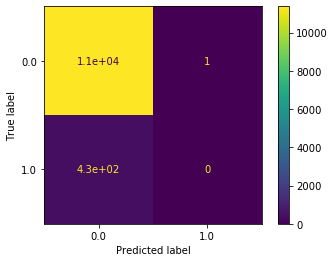

In [9]:
%%time

custom_classification_report(clf, x_test, y_test)

### Train GaussianNB

In [10]:
%%time

clf = GaussianNB()
clf = clf.fit(x_train, y_train)

CPU times: user 556 ms, sys: 0 ns, total: 556 ms
Wall time: 555 ms


not fraud
precision: 0.016789732770745427
recall: 0.9182692307692307
f1-score: 0.03297651933701657
support: 208


is fraud
precision: 0.9608294930875576
recall: 0.03594207895190484
f1-score: 0.06929212362911266
support: 11602


accuracy: 0.051481795088907704


macro avg
precision: 0.48880961292915154
recall: 0.4771056548605678
f1-score: 0.05113432148306461
support: 11810


weighted avg
precision: 0.9442028825756271
recall: 0.051481795088907704
f1-score: 0.0686525261953484
support: 11810


CPU times: user 285 ms, sys: 0 ns, total: 285 ms
Wall time: 279 ms


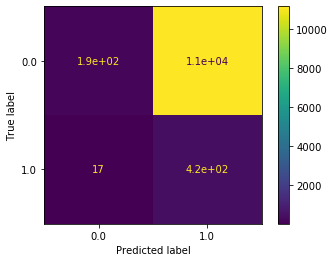

In [11]:
%%time

custom_classification_report(clf, x_test, y_test)